___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [6]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

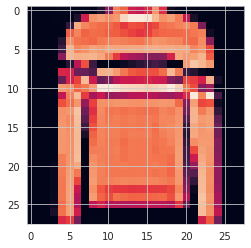

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

2

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [12]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

Class names:
- 0        T-shirt/top
- 1        Trouser
- 2        Pullover
- 3        Dress
- 4        Coat
- 5        Sandal
- 6        Shirt
- 7        Sneaker
- 8        Bag
- 9        Ankle boot

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
y_train[0]

9

In [17]:
classes[int(y_train[0])]

'Ankle boot'

In [19]:
int(np.random.randint(low=0, high=50000, size=1))

45012

In [20]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,   0,
          0,   0,   0,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  13,   9, 174, 103,  53,
         85,  70, 104,  63,  23,  33,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0, 143,  94, 184,  24,   0,
         58,   6,   0, 114, 159,   0,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70, 141, 166,  12,  29,
        255,   0, 107, 192,   9,   0, 162,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,  47, 180,  12,   0,  43,
        204,   0, 254,  49,   0,  40, 161,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  62,  13,  89,  15,  81,  45,
        190,   0,  24,   0,   0,  14,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

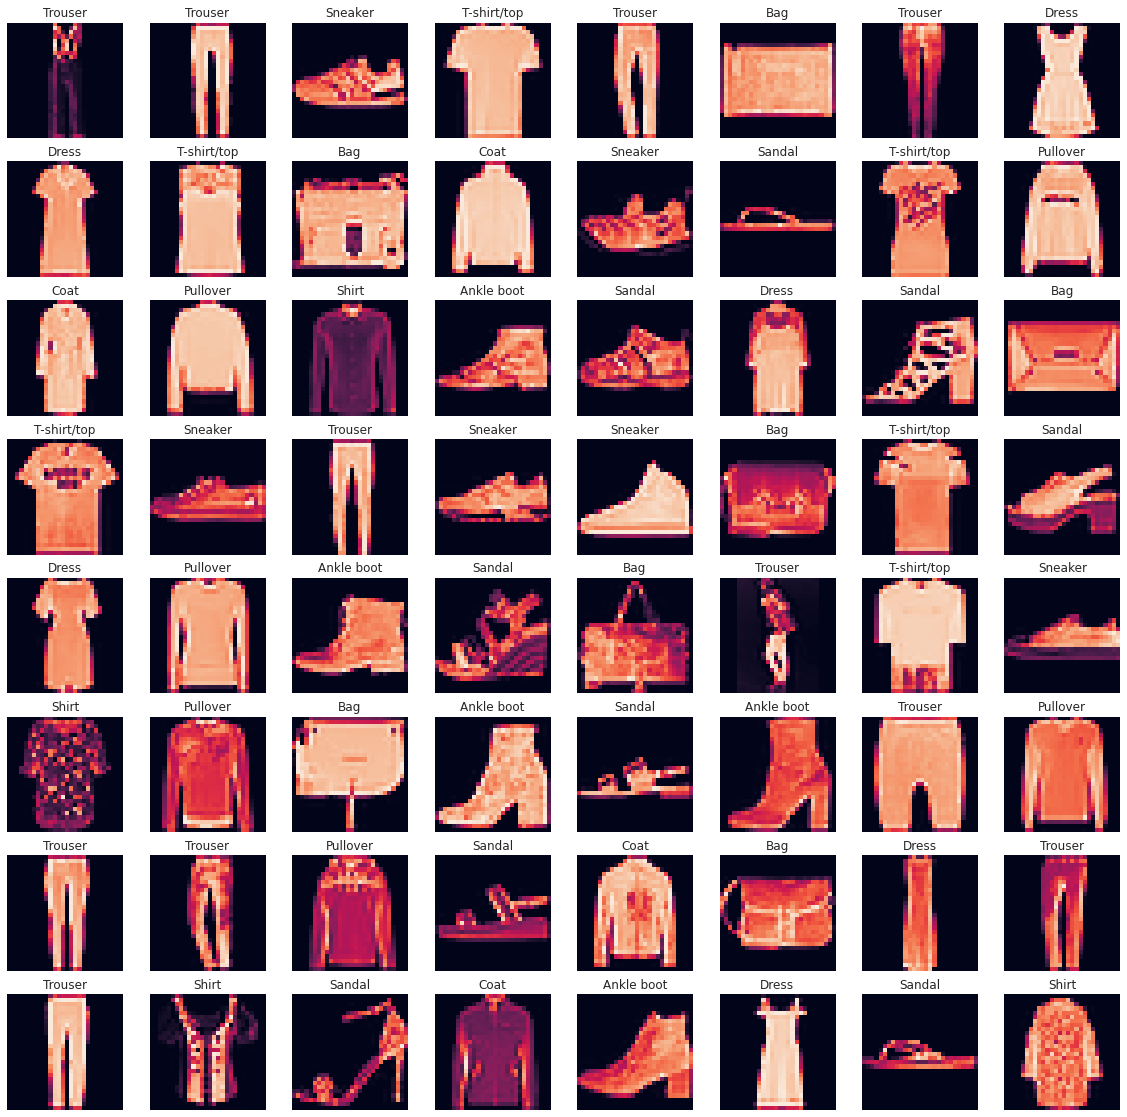

In [21]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [22]:
X_train[5].min()

0

In [23]:
X_train[5].max()

255

In [24]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train[5].min()

0.0

In [28]:
X_train[5].max()

1.0

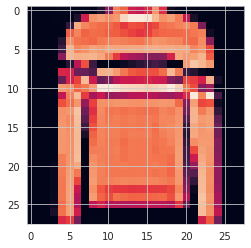

In [29]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

X train: 60000 tane, 28x28 pixel, 1 kanal demek.

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [34]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [36]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

Early stop, early fit metric olarak val los kullansin, 2 eopch da iyilesmezse egitimi bitirsin, ama bana aldigi en iyi sonucu versin.

In [40]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 21s 5ms/step - loss: 0.4209 - accuracy: 0.8457 - val_loss: 0.3409 - val_accuracy: 0.8804
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2772 - accuracy: 0.8979 - val_loss: 0.2726 - val_accuracy: 0.9023
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2415 - accuracy: 0.9140 - val_loss: 0.2670 - val_accuracy: 0.9048
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2211 - accuracy: 0.9197 - val_loss: 0.2631 - val_accuracy: 0.9115
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2081 - accuracy: 0.9262 - val_loss: 0.2520 - val_accuracy: 0.9117
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1995 - accuracy: 0.9295 - val_loss: 0.3291 - val_accuracy: 0.8967
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1947 - accuracy: 0.9327 - val_loss: 0.2861 - val_accuracy

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.421,0.846,0.341,0.880
1,0.277,0.898,0.273,0.902
2,0.241,0.914,0.267,0.905
3,0.221,0.920,0.263,0.911
4,0.208,0.926,0.252,0.912


**TASK 7: Plot values of metrics you used in your model.**

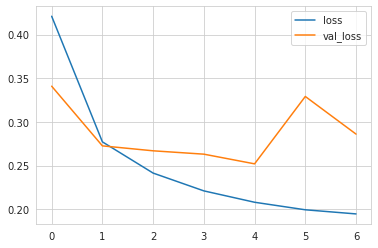

In [43]:
summary[["loss", "val_loss"]].plot();

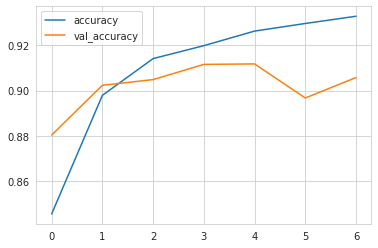

In [44]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2520 - accuracy: 0.9117


[0.25203049182891846, 0.9117000102996826]

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25203049182891846
Test accuracy: 0.9117000102996826


In [48]:
pred_prob = model.predict(X_test)

In [49]:
y_pred = np.argmax(pred_prob, axis=1)

In [50]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.82      0.86      1000
           3       0.88      0.95      0.92      1000
           4       0.85      0.85      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [52]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [53]:
print(confusion_matrix(y_test, y_pred))

[[913   0   7  18   2   1  53   0   6   0]
 [  2 985   0  10   1   0   0   0   2   0]
 [ 20   1 825   7  59   0  86   0   2   0]
 [ 17   5   5 955   4   0  12   0   2   0]
 [  0   0  48  52 853   0  45   0   2   0]
 [  0   0   0   0   0 967   0  27   2   4]
 [145   2  38  34  78   0 696   0   7   0]
 [  0   0   0   0   0   4   0 977   0  19]
 [  3   1   0   5   1   2   0   4 984   0]
 [  0   0   0   0   0   7   0  31   0 962]]


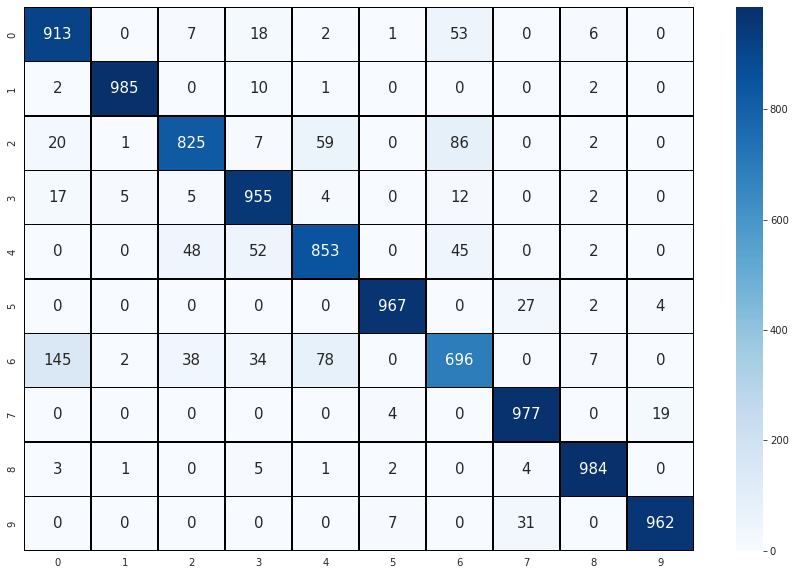

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# With BatchNormalization

In [60]:
model2 = Sequential()

model2.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [61]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 28)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 28)       112       
 hNormalization)                                                 
                                                      

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [64]:
model2.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3912 - accuracy: 0.8600 - val_loss: 0.3452 - val_accuracy: 0.8732
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2802 - accuracy: 0.9016 - val_loss: 0.3562 - val_accuracy: 0.8873
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2593 - accuracy: 0.9117 - val_loss: 0.3233 - val_accuracy: 0.8893
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2473 - accuracy: 0.9153 - val_loss: 0.3327 - val_accuracy: 0.9006
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2399 - accuracy: 0.9185 - val_loss: 0.4393 - val_accuracy: 0.8917


In [65]:
model2.metrics_names

['loss', 'accuracy']

In [66]:
summary2 = pd.DataFrame(model2.history.history)
summary2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.391,0.860,0.345,0.873
1,0.280,0.902,0.356,0.887
2,0.259,0.912,0.323,0.889
3,0.247,0.915,0.333,0.901
4,0.240,0.919,0.439,0.892


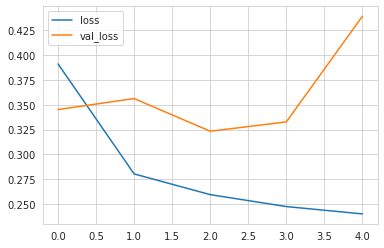

In [67]:
summary2[["loss", "val_loss"]].plot();

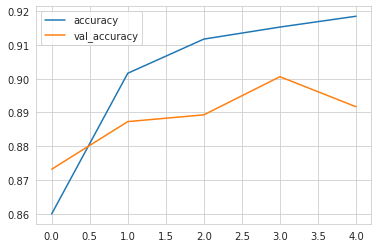

In [68]:
summary2[["accuracy", "val_accuracy"]].plot();

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8893


[0.3232853412628174, 0.8892999887466431]

In [71]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3232853412628174
Test accuracy: 0.8892999887466431


In [72]:
pred_prob = model2.predict(X_test)

In [73]:
y_pred = np.argmax(pred_prob, axis=1)

In [74]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.80      0.86      0.83      1000
           3       0.84      0.95      0.89      1000
           4       0.83      0.81      0.82      1000
           5       0.94      0.99      0.97      1000
           6       0.77      0.64      0.70      1000
           7       0.91      0.96      0.93      1000
           8       1.00      0.94      0.97      1000
           9       0.99      0.89      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [76]:
print(confusion_matrix(y_test, y_pred))


[[875   0  19  34   2   2  68   0   0   0]
 [  1 974   1  17   2   0   5   0   0   0]
 [ 22   1 863   7  57   0  50   0   0   0]
 [ 15   0   9 949   7   0  20   0   0   0]
 [  0   0  99  61 805   0  34   0   1   0]
 [  0   0   0   0   0 992   0   7   0   1]
 [133   0  73  53  99   0 641   0   1   0]
 [  0   0   0   0   0  32   0 964   0   4]
 [  7   2   9  13   3   8  13   7 938   0]
 [  0   0   1   0   0  20   0  87   0 892]]


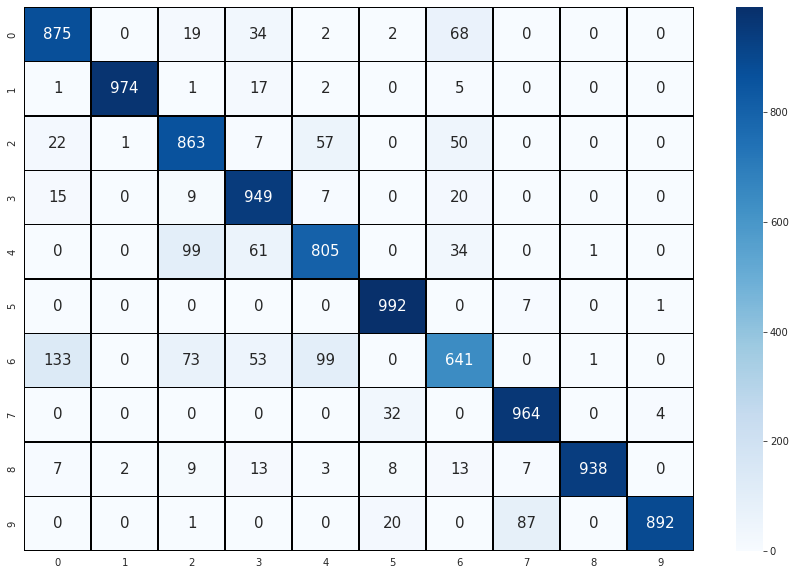

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [78]:
my_image = X_test[44]

In [79]:
my_image.shape

(28, 28)

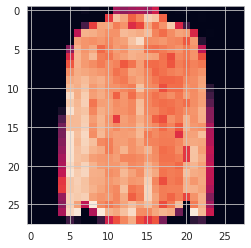

In [80]:
plt.imshow(my_image)

In [81]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [82]:
image_prediction

array([[8.8676543e-06, 5.4924596e-11, 2.7327263e-04, 4.0551063e-06,
        6.8505615e-02, 3.0480091e-10, 9.3120807e-01, 1.1762537e-10,
        5.0753741e-08, 1.9468063e-08]], dtype=float32)

In [83]:
np.argmax(image_prediction, axis=1)

array([6])

In [84]:
result=np.argmax(image_prediction, axis=1)

In [85]:
result

array([6])

In [86]:
classes[int(result)]

'Shirt'

In [87]:
model.save("cnn-fashion_mnist.h5")

In [88]:
model=tf.keras.models.load_model("cnn-fashion_mnist.h5")

In [89]:
X_test[21].shape

(28, 28)

In [90]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [91]:
np.argmax(pred)

1

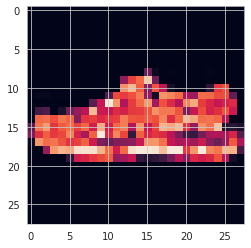

In [93]:
plt.imshow(X_test[21])

In [95]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___